
# <span style="color:teal;"> **Pneumonia Detection:** </span>


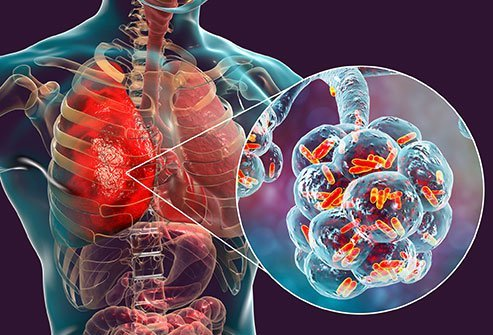

# <span style="color:teal;"> Introduction about Pneumonia: </span>


## <span style="color:teal;"> What is Pneumonia? </span>


<span style="font-size:18px;"> <span style="color:maroon;"> Pneumonia is an infection that affects one or both lungs. It causes the air sacs, or alveoli, of the lungs to fill up with fluid or pus. **Bacteria, viruses, or fungi may cause pneumonia.** Symptoms can range from mild to serious and may include a cough with or without mucus (a slimy substance), fever, chills, and trouble breathing. How serious your pneumonia is depends on your age, your overall health, and what is causing your infection. </span></span>



## <span style="color:teal;"> How doctors diagnoses pneumonia? </span>


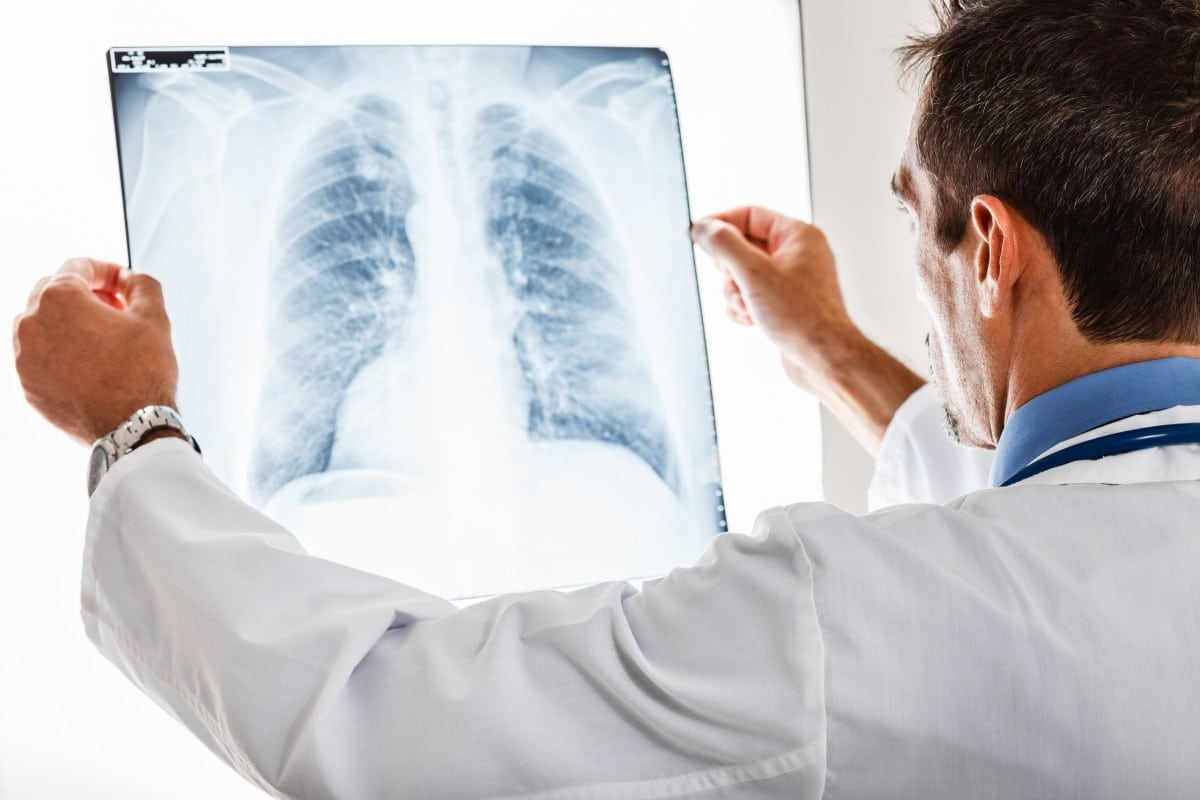


<span style="font-size:18px;"> <span style="color:maroon;"> Your doctor will review your medical history, perform a physical exam, and order diagnostic tests such as a **chest X-ray**. This information can help your doctor determine what type of pneumonia you have. </span></span>


<span style="font-size:18px;"> <span style="color:maroon;"> Treatment for pneumonia may include antibiotics or viral or fungal medicines. It may take several weeks to recover from pneumonia. If your symptoms get worse, you should see a doctor right away. If you have severe pneumonia, you may need to go to the hospital for antibiotics given through an intravenous (IV) line and oxygen therapy. </span></span>



<span style="font-size:20px;"> <span style="color:maroon;"> Since one of the important diagnostic factors for pneumonia is the doctor’s use of x-rays to make x-rays on the chest and lungs, it appears to us the importance of creating a machine learning model that is able to differentiate between **infected x-ray images and other uninfected images.** </span></span>


# <span style="color:teal;"> Importing the main libraries </span>


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf

# <span style="color:teal;"> Import the data and set up </span>


In [2]:
main_dirction_path = '../input/chest-xray-pneumonia/chest_xray'
print(os.listdir(main_dirction_path))

['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [3]:
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

In [4]:
# train 
os.listdir(train_folder_path)

['PNEUMONIA', 'NORMAL']

In [5]:
train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

# <span style="color:teal;"> EDA </span>


In [6]:
print(len(os.listdir(train_n_path))) #length of normal training images
print(len(os.listdir(train_p_path))) #length of pneumonia training images 
print('TOTAL TRAIN IMAGES:', len(os.listdir(train_n_path)) + len(os.listdir(train_p_path)))

1341
3875
TOTAL TRAIN IMAGES: 5216


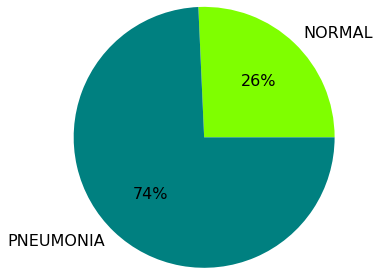

In [7]:
x = np.array([len(os.listdir(train_n_path)),len(os.listdir(train_p_path))])
labels = ['NORMAL', 'PNEUMONIA']
colors = {'NORMAL': 'chartreuse','PNEUMONIA': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()


<span style="font-size:18px;"> <span style="color:maroon;"> We note data is imbalance,
we will deal with that leater in this notebook in Preprosessing section. </span></span>

## <span style="color:teal;"> Visulaization random samples of Normal images and Pneumonia images: </span>


(-0.5, 1095.5, 623.5, -0.5)

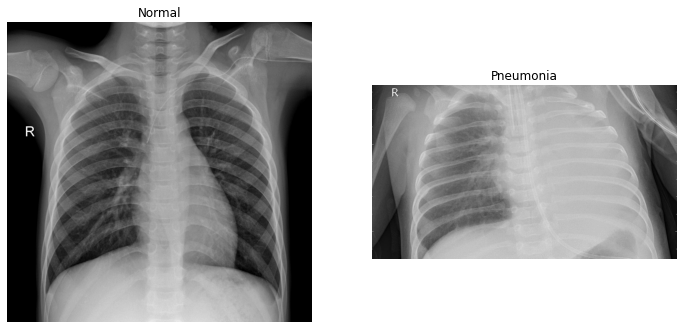

In [8]:
# Choose random image from normal folder
random_normal= np.random.randint(0,len(os.listdir(train_n_path))) 
normal_img = os.listdir(train_n_path)[random_normal]
normal_img_address = train_n_path+normal_img

# Choose random image from pneumonia folder
random_pneumonia = np.random.randint(0,len(os.listdir(train_p_path)))
pneumonia_img =  os.listdir(train_p_path)[random_pneumonia]
pneumonia_img_address = train_p_path+pneumonia_img

#Load 2 images
normal_load = Image.open(normal_img_address)
pneumonia_load = Image.open(pneumonia_img_address)

#Visulaizaion 
figure = plt.figure(figsize= (12,12))
img1 = figure.add_subplot(1,2,1)
img_plot = plt.imshow(normal_load, cmap = 'gray')
img1.set_title('Normal')
plt.axis("off")

img2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_load, cmap = 'gray')
img2.set_title('Pneumonia')
plt.axis("off")


In [9]:
normal_load.size

(2218, 2183)

In [10]:
pneumonia_load.size

(1096, 624)

The dimensions of images is not the same.

In [11]:
def show_normal_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        normal_img = os.listdir(train_n_path)[n]
        normal_img_address = train_n_path+normal_img
        normal_load = Image.open(normal_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(normal_load, cmap ='gray')
        plt.title("NORMAL")
        plt.axis("off")
        
def show_pneumonia_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        pneumonia_img =  os.listdir(train_p_path)[n]
        pneumonia_img_address = train_p_path+pneumonia_img
        pneumonia_load = Image.open(pneumonia_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(pneumonia_load, cmap ='gray')
        plt.title("PNEUMONIA")
        plt.axis("off")

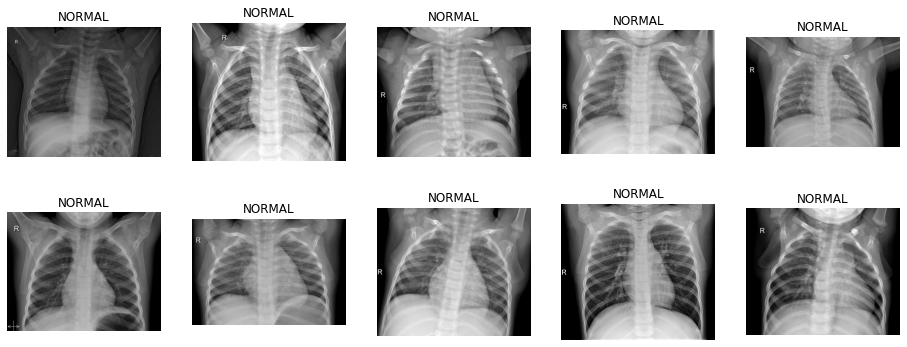

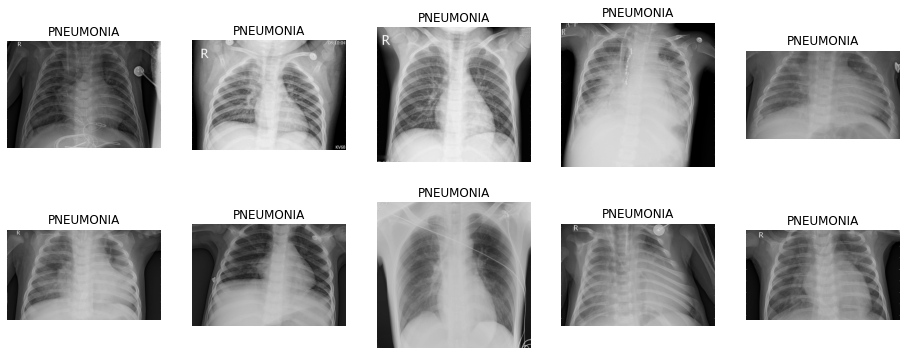

In [12]:
show_normal_images(10)
show_pneumonia_images(10)

# <span style="color:teal;"> Preprocessing: </span>


In [13]:
from skimage import exposure

In [14]:
img = np.asarray(normal_load)
image_eq = exposure.equalize_hist(img)

(-0.5, 2217.5, 2182.5, -0.5)

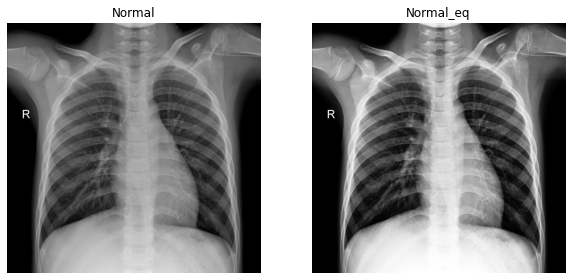

In [15]:
figure1 = plt.figure(figsize= (10,10))
img_1 = figure1.add_subplot(1,2,1)
img_plot = plt.imshow(img, cmap = 'gray')
img_1.set_title('Normal')
plt.axis("off")

img2 = figure1.add_subplot(1, 2, 2)
img_plot = plt.imshow(image_eq, cmap = 'gray')
img2.set_title('Normal_eq')
plt.axis("off")

<span style="font-size:16px;"> <span style="color:maroon;"> We note the histogram equlization using exposure make the image better constrant.</span></span>

In [16]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq

In [17]:
os.listdir(train_folder_path)

['PNEUMONIA', 'NORMAL']

## <span style="color:teal;"> Improve Class Imbalance using Class Weights: </span>


<span style="font-size:16px;"> <span style="color:maroon;"> Most machine learning algorithms are not very useful with biased class data. But, we can modify the current training algorithm **to take into account the skewed distribution of the classes.** This can be achieved by **giving different weights to both the majority and minority classes**. The difference in weights **will influence the classification of the classes during the training phase**. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class. </span></span>

<span style="font-size:16px;"> <span style="color:maroon;"> The formula to calculate this is:<br> <br> **W<sub>j</sub> = n_samples / (n_classes * n_samples<sub>j</sub>)**<br> <br> W<sub>j</sub> is the weight for each class(j signifies the class).
<br>n_samples is the total number of samples or rows in the dataset.
<br>n_classes is the total number of unique classes in the target.
<br>n_samples<sub>j</sub> is the total number of rows of the respective class. </span></span>


In [18]:
TRAIN_IMG_COUNT = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
COUNT_NORMAL = len(os.listdir(train_n_path))
COUNT_PNEUMONIA = len(os.listdir(train_p_path))

weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_NORMAL)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_PNEUMONIA)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [19]:
(weight_for_0)

1.9448173005219984

In [20]:
weight_for_1

0.6730322580645162

<span style="font-size:16px;"> <span style="color:maroon;"> weight_for_0 (Normal Images) is higher because it's the  minority class.</span></span>

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [22]:
"""The function ImageDataGenerator augments your image by iterating through 
image as your CNN is getting ready to process that image"""

img_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)


training_set = img_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (256, 256),
                                                 batch_size = 5,
                                                 color_mode='grayscale',
                                                 subset='training',
                                                 class_mode = 'binary')

validation_generator = img_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        subset="validation",
                                                        color_mode='grayscale',
                                                        class_mode='binary')

test_set = img_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (256, 256),
                                            batch_size = 5,
                                            color_mode='grayscale',
                                            shuffle=False,
                                            class_mode = 'binary')

Found 3913 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


 
# <span style="color:teal;"> CNN Model: </span>

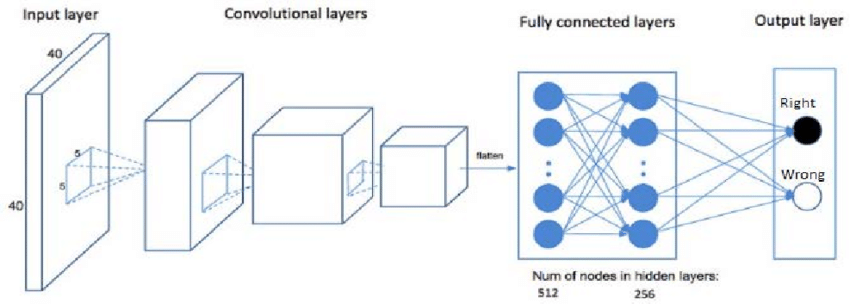

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      1

In [27]:
cnn_model = model.fit(training_set,
                      epochs = 10 ,
                      steps_per_epoch = training_set.samples // 5,
                      validation_data = validation_generator,
                      validation_steps = validation_generator.samples // 5,
                      class_weight = class_weight 
                      )

2022-01-02 08:13:47.280917: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
782/782 [==============================] - 799s 1s/step - loss: 0.4895 - accuracy: 0.7574 - val_loss: 0.3502 - val_accuracy: 0.8508
Epoch 2/10
782/782 [==============================] - 792s 1s/step - loss: 0.3996 - accuracy: 0.8270 - val_loss: 0.2714 - val_accuracy: 0.8962
Epoch 3/10
782/782 [==============================] - 796s 1s/step - loss: 0.3525 - accuracy: 0.8444 - val_loss: 0.2482 - val_accuracy: 0.9031
Epoch 4/10
782/782 [==============================] - 793s 1s/step - loss: 0.3565 - accuracy: 0.8439 - val_loss: 1.2797 - val_accuracy: 0.8531
Epoch 5/10
782/782 [==============================] - 798s 1s/step - loss: 0.3447 - accuracy: 0.8593 - val_loss: 0.3073 - val_accuracy: 0.8769
Epoch 6/10
782/782 [==============================] - 803s 1s/step - loss: 0.3011 - accuracy: 0.8723 - val_loss: 0.2047 - val_accuracy: 0.9200
Epoch 7/10
782/782 [==============================] - 800s 1s/step - loss: 0.3264 - accuracy: 0.8611 - val_loss: 0.3011 - val_accuracy: 0.8777

<AxesSubplot:>

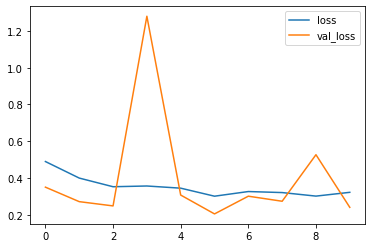

In [28]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

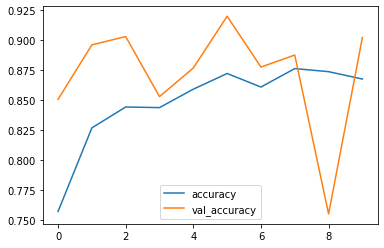

In [29]:
losses[['accuracy','val_accuracy']].plot()

In [30]:
loss, acc = model.evaluate(test_set)

125/125 [==============================] - 33s 265ms/step - loss: 0.6521 - accuracy: 0.7548


In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save('CNN_PNEUMONIA.h5')

In [33]:
#cnn_model = load_model("./CNN_PNEUMONIA.h5")

In [34]:
Predections = model.predict(test_set)

In [35]:
Predections = (Predections>0.5).astype(np.int)
Predections

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(test_set.classes, Predections, target_names = ['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.94      0.41      0.57       234
   Pneumonia       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.81      0.77      0.74       624



In [38]:
confusion_matrix(test_set.classes, Predections>0.5)

array([[ 96, 138],
       [  6, 384]])

<AxesSubplot:>

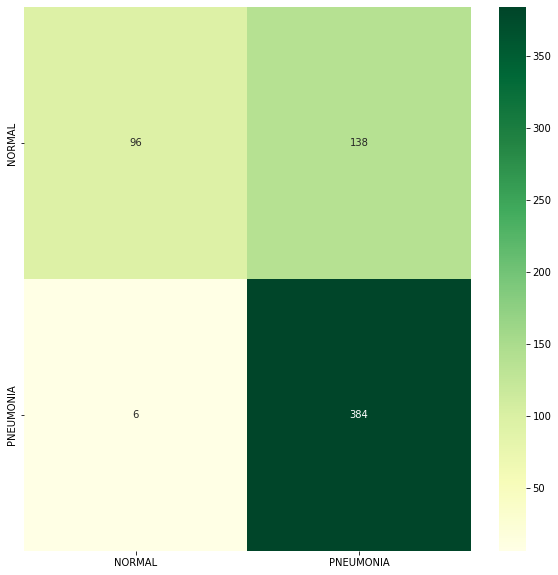

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(test_set.classes, Predections>0.5),cmap= "YlGn", 
            annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [40]:
correct_pred = np.nonzero(Predections == test_set.classes)[0]
incorrect_pred = np.nonzero(Predections != test_set.classes)[0]

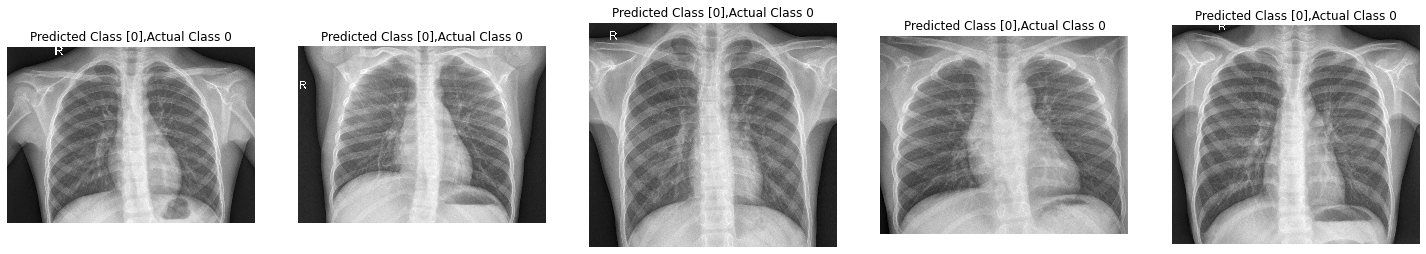

In [41]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in correct_pred[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(Image.open(test_set.filepaths[i]), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(Predections[c], test_set.classes[c]))
    plt.tight_layout()
    plt.axis("off")
    i += 1

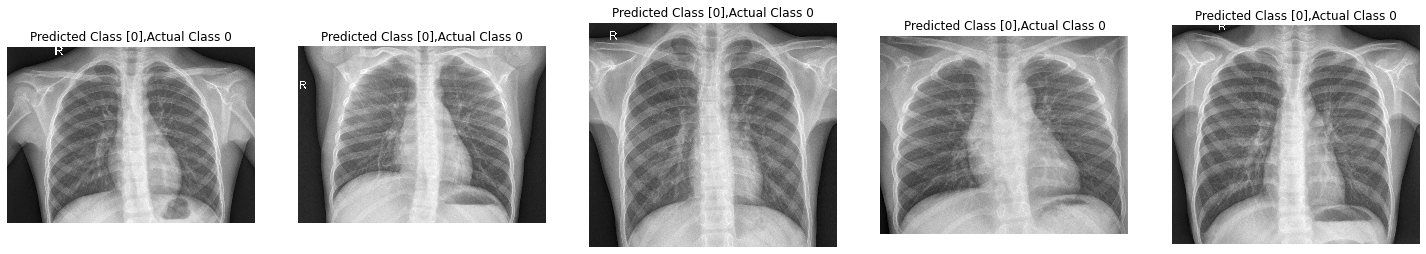

In [42]:
i = 0
figure = plt.figure(figsize= (20,20))
for c in incorrect_pred[:5]:
    ax = plt.subplot(5,5,i+1)
    plt.imshow(Image.open(test_set.filepaths[i]), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(Predections[c], test_set.classes[c]))
    plt.tight_layout()
    plt.axis("off")
    i += 1

 # <span style="color:teal;"> Reccomendation: </span>

<span style="font-size:16px;"> <span style="color:maroon;"> In some cases, the model does not succeed in distinguishing between an infected and a non-infected condition, so it is possible to address this issue by informing the model on clearer images. Also, in some cases that are uncertain or not, doctors can use a CT scan, as it is more accurate and shows a cross-section of the body and lung. </span></span>


 # <span style="color:teal;"> References: </span>

* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
* https://keras.io/api/preprocessing/image/
* https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
* https://www.nhlbi.nih.gov/health/pneumonia
* https://towardsdatascience.com/dealing-with-imbalanced-data-in-tensorflow-class-weights-60f876911f99